In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [104]:
dataset=pd.read_csv(r'tips_data.csv')

In [105]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [107]:
dataset.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [108]:
dataset = pd.get_dummies(dataset,columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Regression techniques:-
**1. Linear Regression**

In [109]:
X = dataset.drop('tip', axis=1)
y = dataset['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
# List to store model results
model_results = {}

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}


2. Ridge Regression

In [112]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
model_results['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}


3. Lasso Regression

In [113]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
model_results['Lasso Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}

4. Decision Tree Regression

In [114]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
model_results['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_tree),
    'MSE': mean_squared_error(y_test, y_pred_tree),
    'R2': r2_score(y_test, y_pred_tree)
}

5. Random Forest Regression

In [115]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

6. Support Vector Regression (SVR)

In [116]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
model_results['SVR'] = {
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

7. KNN Regression

In [117]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
model_results['KNN'] = {
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

Printing model results

In [118]:
for model, metrics in model_results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Linear Regression:
  MAE: 0.6671
  MSE: 0.7034
  R2: 0.4373
Ridge Regression:
  MAE: 0.6665
  MSE: 0.7007
  R2: 0.4394
Lasso Regression:
  MAE: 0.6375
  MSE: 0.5909
  R2: 0.5273
Decision Tree:
  MAE: 0.8296
  MSE: 1.2552
  R2: -0.0042
Random Forest:
  MAE: 0.7557
  MSE: 0.9197
  R2: 0.2642
SVR:
  MAE: 0.5680
  MSE: 0.5324
  R2: 0.5741
KNN:
  MAE: 0.7189
  MSE: 0.8764
  R2: 0.2989


Best model is the one with highest R2 and lowest MSE, so in this case, it is SVR

# VISUALISATION

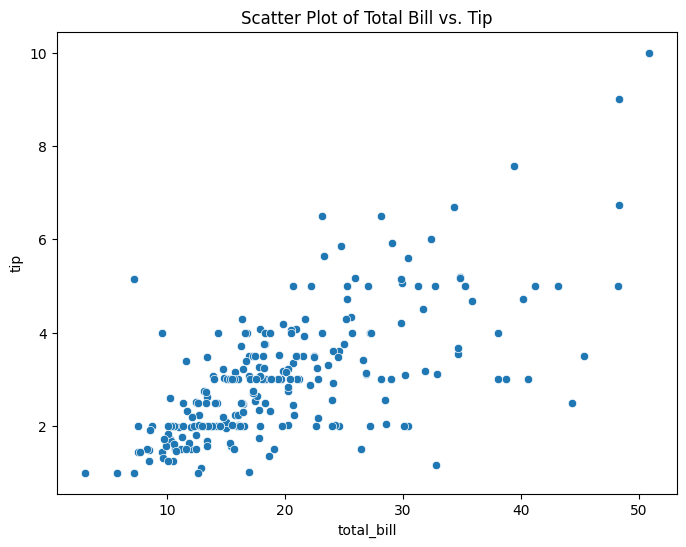

In [119]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=dataset)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

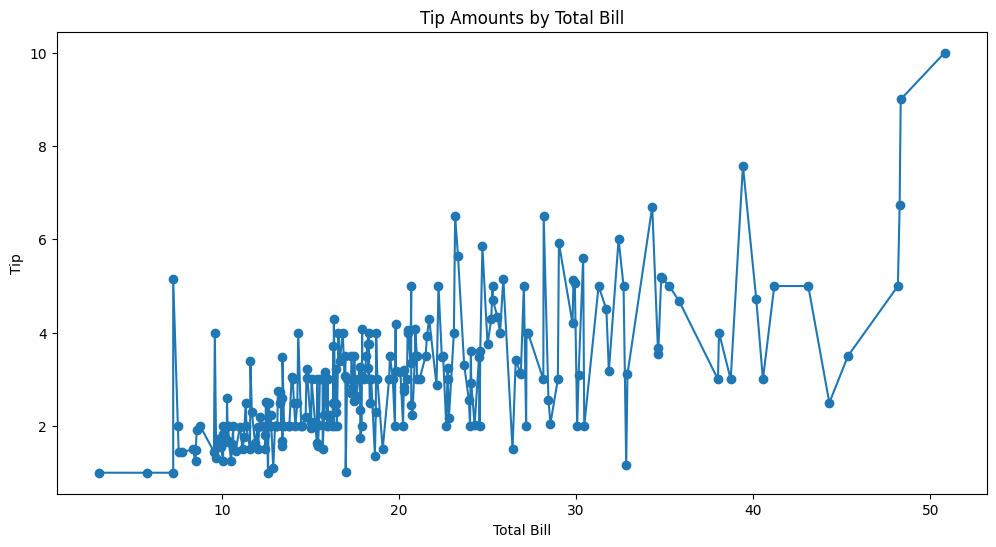

In [126]:
# Line Plot
sorted_data = dataset.sort_values(by='total_bill')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

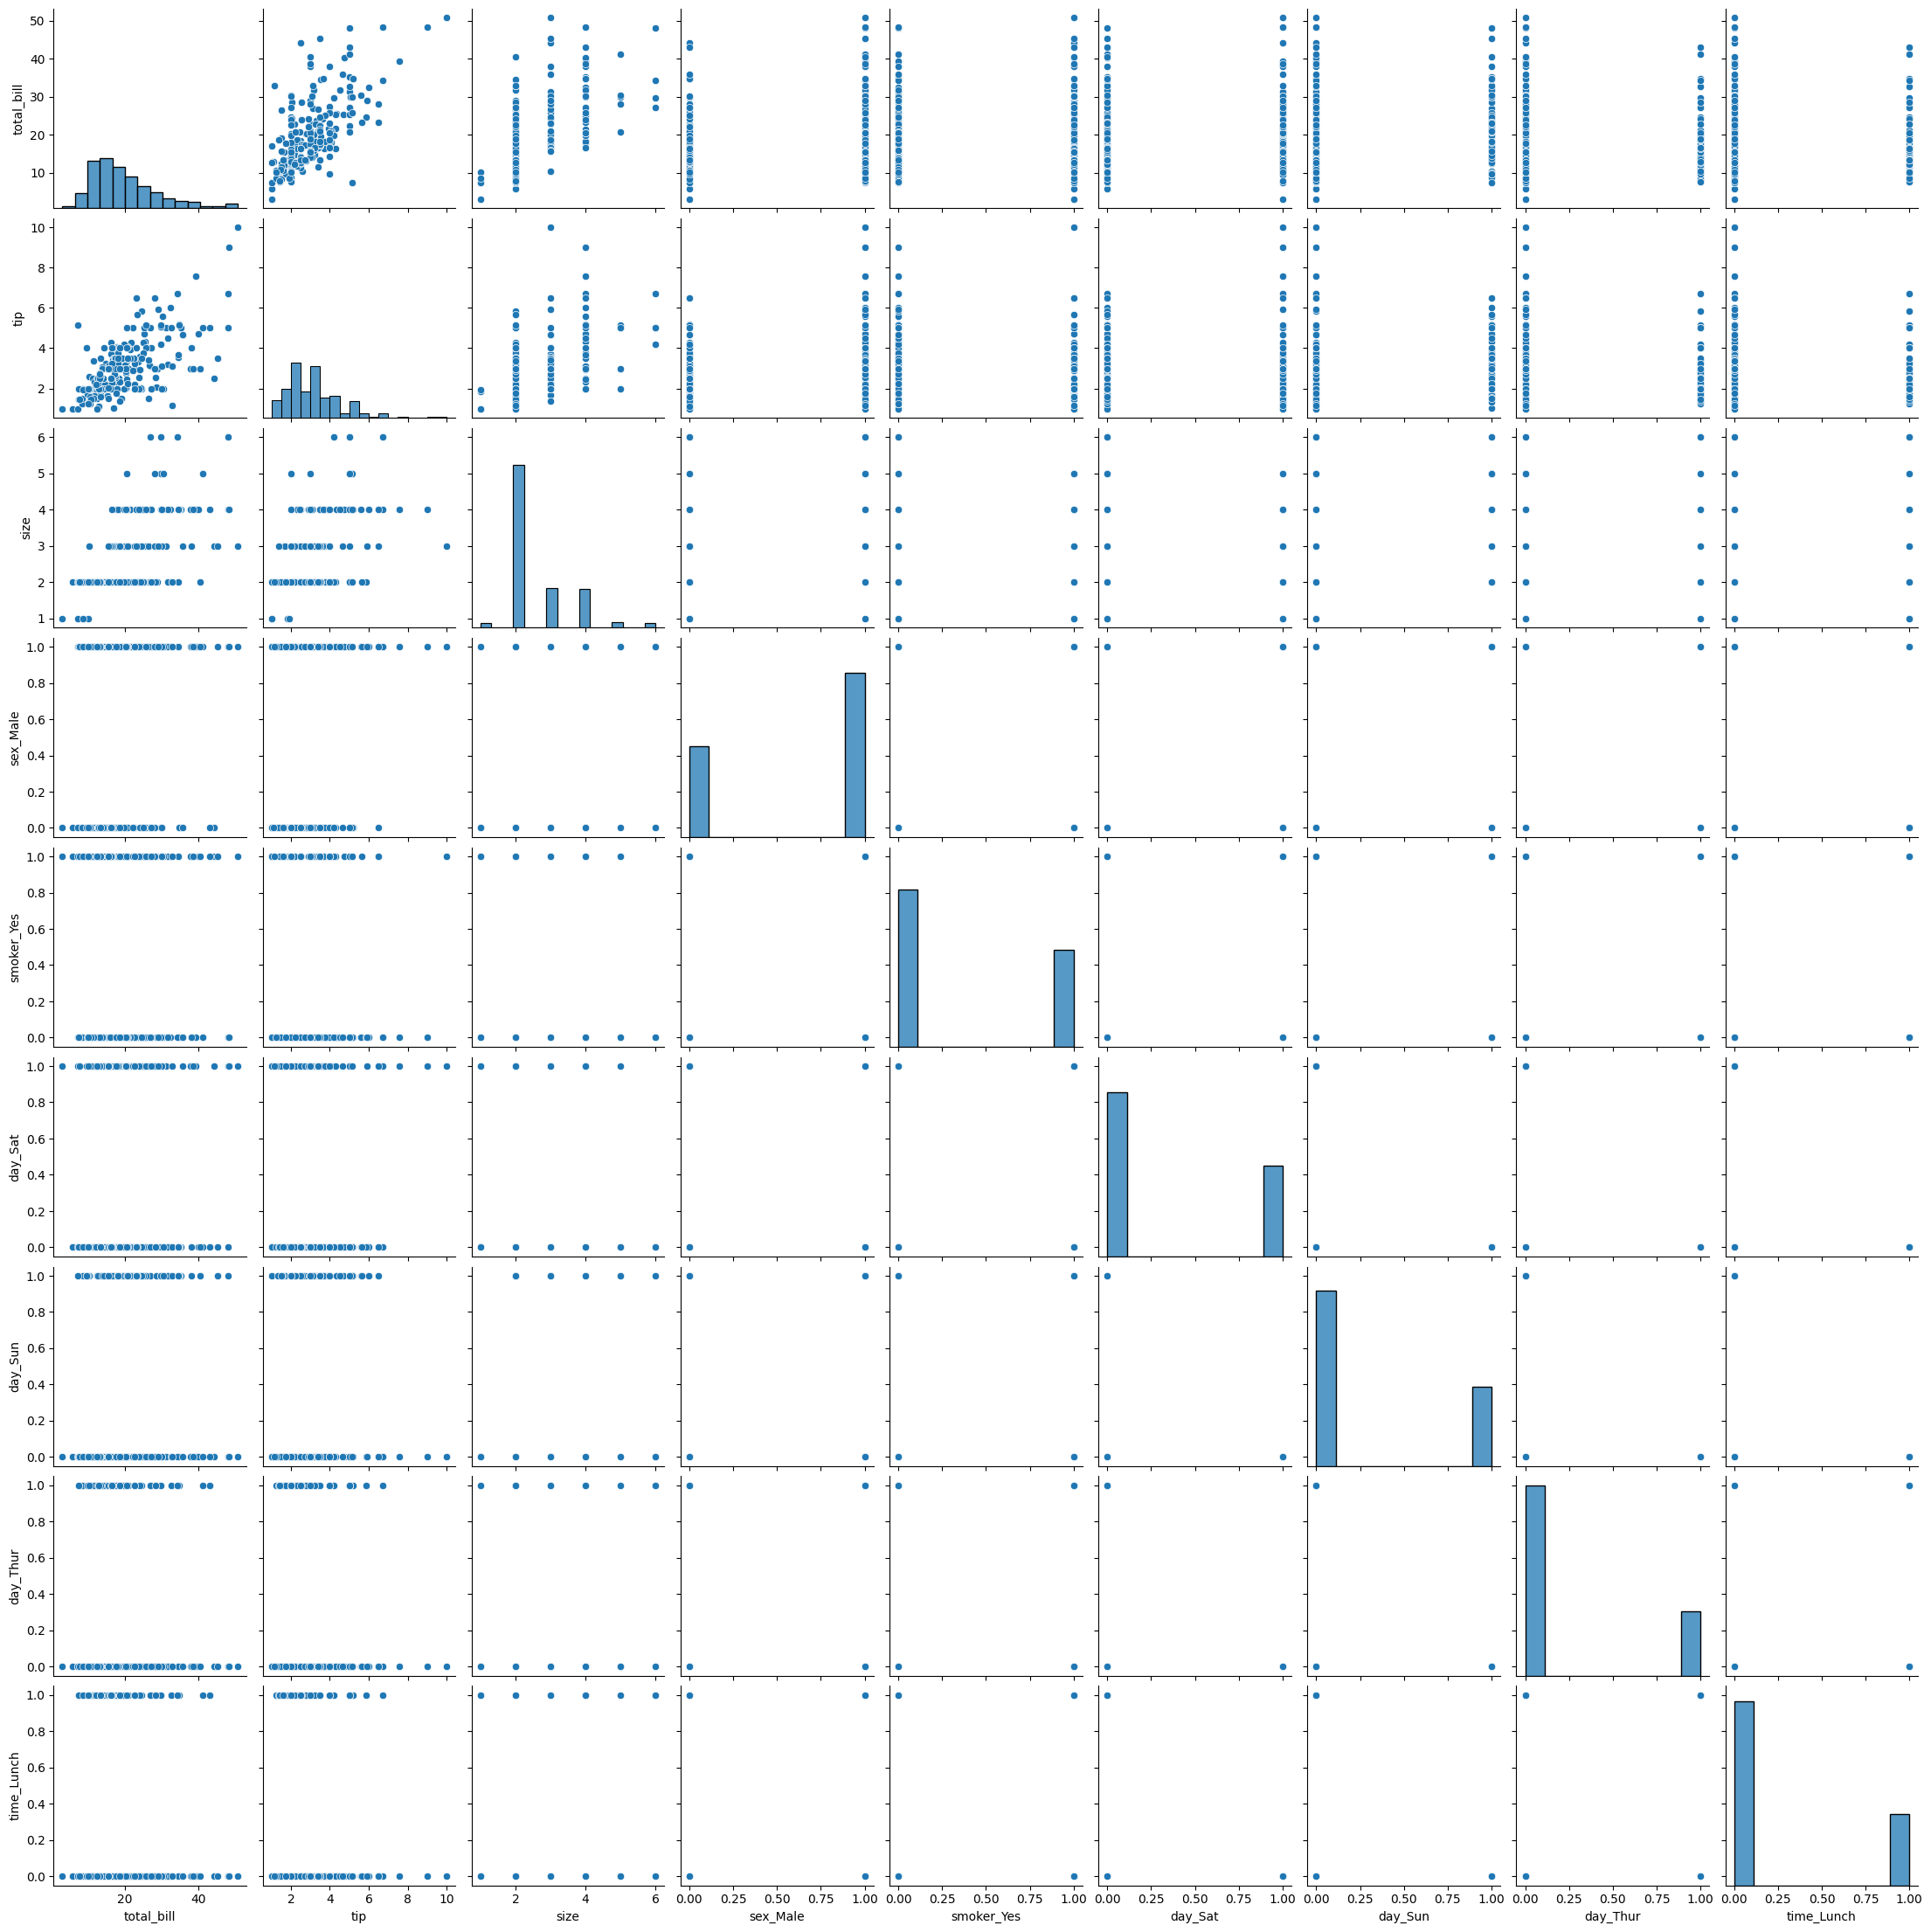

In [127]:
# Pair Plot
sns.pairplot(dataset)
plt.show()

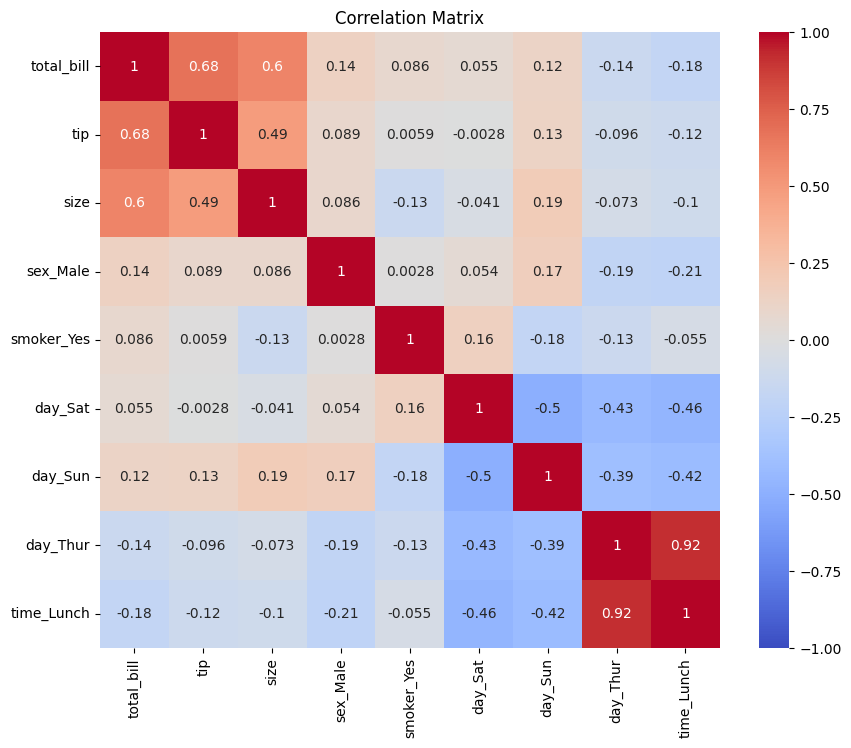

In [121]:
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

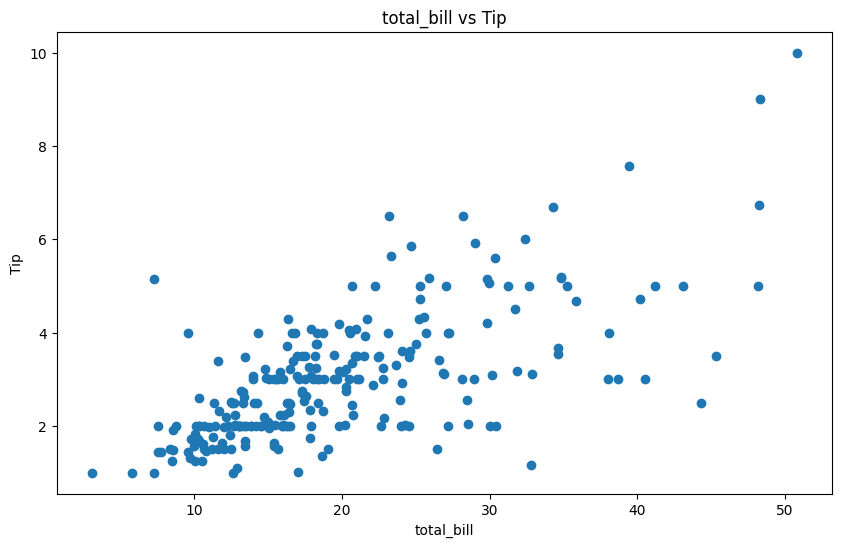

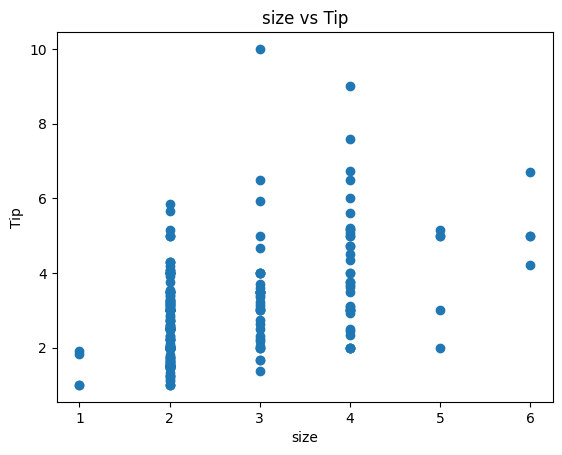

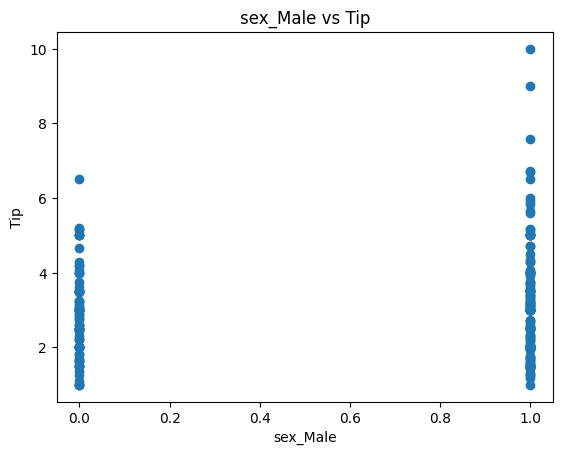

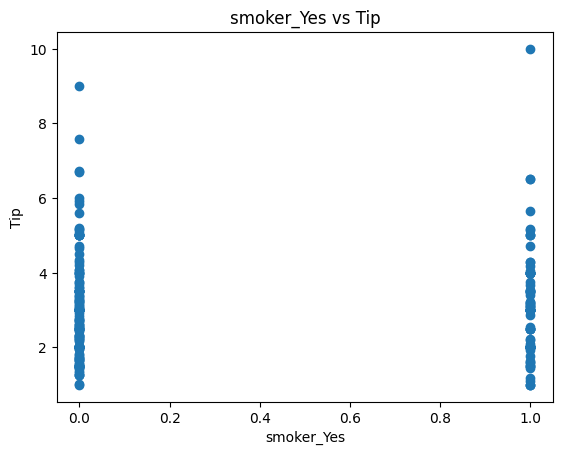

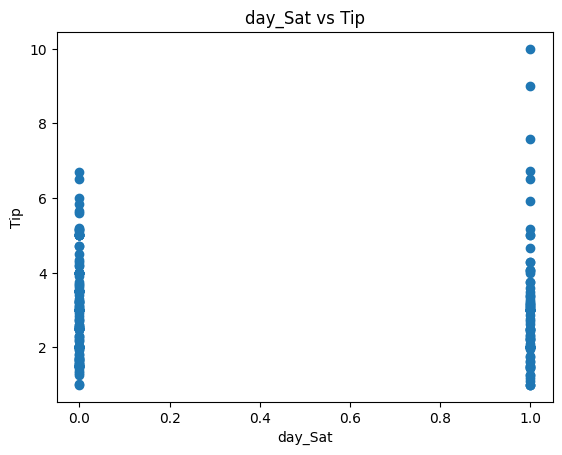

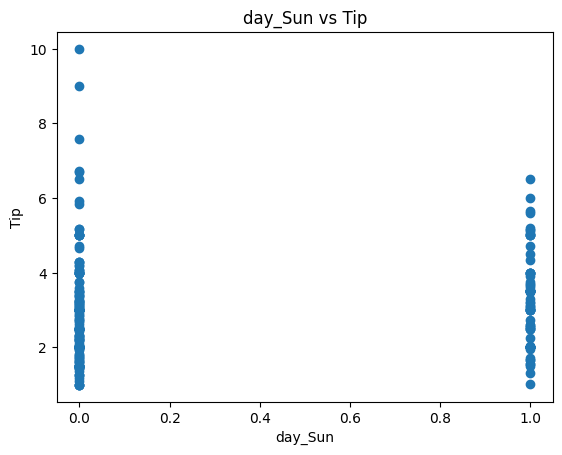

In [130]:
df_data = dataset.drop(columns=['tip'])
df_target = dataset['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()



*  We can see that the tip amount is higher for the dinner time compared to the lunch time
*  The lowest amount of tips received on the Friday
*  The highest variance in tips are received on the Saturday
*  The highest amount of tips are received on the Sunday
*  Men tip noticably more than women
*  Smoker and non-smoker tip same

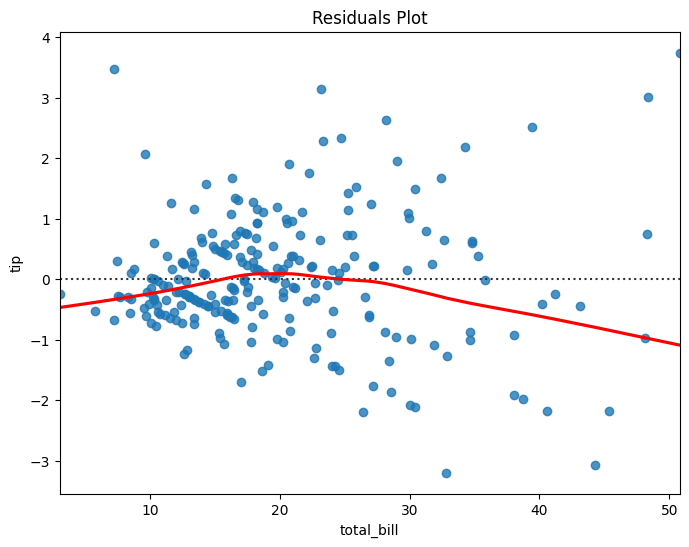

In [122]:
# Residuals Plot
plt.figure(figsize=(8, 6))
sns.residplot(x='total_bill', y='tip', data=dataset, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.show()

In [124]:
# Rainbow test
X = dataset[['total_bill', 'size']]  # Replace with relevant predictors
y = dataset['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected (p < 0.05), consider non-linear models.")
else:
    print("Data appears linear (p >= 0.05).")


Rainbow test p-value: 0.17048935693447634
Data appears linear (p >= 0.05).


# Conclusion


*  The business should target their best servie to customers on the Sundays and increase quality of services on the Friday to make the tip rate higher.
*  The business should also focus on the dinner time to increase the tip rate

* Higher number of people in a table should be given higher priority as they tend to tip more
* The business should also focus on the total bill as it has a high correlation with the tip amount
